**Strategy Recommendations for Financial Debt Accounts**

This analysis is designed to uncover valuable insights within the financial debt account portfolio, offering strategic recommendations tailored to each account's unique profile. To achieve this, cluster algorithms have been applied to segment commercial customers into distinct groups. These clusters aid in formulating targeted strategies for each group, enhancing the precision of debt management efforts. The selection of key fields from the data serves as essential features for segmentation, ensuring a comprehensive understanding of account characteristics and guiding the development of effective strategies for debt recovery and management.

There are 2 sections within this analysis:

- Exploratory Data Analysis
- K-means Clustering

**Section1: Data Exploration**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
transaction_data = pd.read_csv('/Users/millieellis/Documents/Data/Insight_Analyst/transaction_data_onemonth.csv')
bureau_data = pd.read_csv('/Users/millieellis/Documents/Data/Insight_Analyst/bureau_data.csv')

***Structure and summary statistics***

In [2]:
# Display first few rows
transaction_data.head()

,ACCOUNT_ID,Account_Current_Balance,Account_Default_Date,Account_Default_Balance,Account_Determination_Date,Account_Determination_Balance,Account_Origination_Date,Account_Purchase_Price,Cumulative_Actual_Collection_Value,Cumulative_Actual_Liquidation_Rate,...,Is_Closed_Account,Is_Irregular_Payer,Is_Late_Payer,Is_New_Arrangement,Is_Non_Payer,Is_Paid_Down,Is_Paid_In_Full,Is_Partial_Settlement,Is_Performing_Arrangement,Month_Since_Last_Payment
0,959,3105.15,NaN,NaN,01/04/2019,3105.15,20/02/2018,841.50,NaN,NaN,...,0,0,0,0,1,0,0,0,0,NaN
1,1561,1783.80,NaN,NaN,01/04/2019,1783.80,18/11/2017,483.41,NaN,NaN,...,0,0,0,0,1,0,0,0,0,NaN
2,3805,1151.00,NaN,NaN,01/04/2019,1151.00,04/05/2018,79.42,NaN,NaN,...,0,0,0,0,1,0,0,0,0,NaN
3,4828,3787.20,NaN,NaN,01/04/2019,3787.20,18/10/2018,261.32,NaN,NaN,...,0,0,0,0,1,0,0,0,0,NaN
4,6716,753.30,04/01/2017,697.0,05/08/2019,753.30,08/02/2015,63.80,NaN,NaN,...,0,0,0,0,1,0,0,0,0,NaN


In [3]:
bureau_data.head()

,ACCOUNT_ID,CUSTOMER_ID,Asset_Type,no_of_credit_lines,no_of_open_credit_lines,no_of_open_paying_credit_lines,no_of_open_credit_lines_in_arreas,no_of_closed_credit_lines,no_of_defaulted_credit_lines,no_of_defaulted_credit_lines_l12m,...,mth_since_l_application,ccj_flag,active_ccj_cnt_last12m,satisfied_ccj_cnt_last12m,IVA_active,Bankruptcy_active,no_of_up_to_date_open_mortgage,no_of_open_credit_cards,no_of_open_loans,no_of_open_motor_finance
0,1,1,Commercial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2,Commercial,13.0,4.0,4.0,0.0,9.0,1.0,0.0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3,3,Commercial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,4,Commercial,6.0,0.0,0.0,0.0,6.0,5.0,0.0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,5,Commercial,19.0,3.0,3.0,0.0,16.0,4.0,0.0,...,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# Summary statistics
transaction_data.describe()

,ACCOUNT_ID,Account_Current_Balance,Account_Default_Balance,Account_Determination_Balance,Account_Purchase_Price,Cumulative_Actual_Collection_Value,Cumulative_Actual_Liquidation_Rate,Is_Broken_Arrangement,Is_Closed_Account,Is_Irregular_Payer,Is_Late_Payer,Is_New_Arrangement,Is_Non_Payer,Is_Paid_Down,Is_Paid_In_Full,Is_Partial_Settlement,Is_Performing_Arrangement,Month_Since_Last_Payment
count,9913.000000,9913.000000,8217.000000,9913.000000,9913.000000,5208.000000,5208.000000,9913.000000,9913.000000,9913.000000,9913.000000,9913.000000,9913.000000,9913.000000,9913.000000,9913.000000,9913.000000,4752.000000
mean,4957.662564,3317.759956,3357.193178,3900.227349,700.923315,1106.503134,0.333825,0.019873,0.057298,0.017855,0.075053,0.006154,0.696459,0.000706,0.003127,0.001412,0.122062,8.484638
std,2862.832569,4835.850487,5552.079548,5085.296552,1339.420275,2584.240046,0.376532,0.139571,0.232424,0.132432,0.263490,0.078207,0.459810,0.026565,0.055837,0.037556,0.327374,10.331130
min,1.000000,-14902.310000,0.000000,143.840000,0.000000,-357.860000,-0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2479.000000,1169.980000,0.000000,1599.170000,155.700000,118.040000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,4957.000000,2119.000000,1950.200000,2583.230000,314.100000,452.430000,0.190000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,7435.000000,3843.040000,3962.780000,4342.630000,707.950000,1222.240000,0.540000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,13.000000
max,9921.000000,102485.210000,90060.000000,90060.000000,31025.040000,78913.130000,9.520000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,38.000000


In [5]:
bureau_data.describe()

,ACCOUNT_ID,CUSTOMER_ID,no_of_credit_lines,no_of_open_credit_lines,no_of_open_paying_credit_lines,no_of_open_credit_lines_in_arreas,no_of_closed_credit_lines,no_of_defaulted_credit_lines,no_of_defaulted_credit_lines_l12m,no_of_defaulted_credit_lines_l6m,...,mth_since_l_application,ccj_flag,active_ccj_cnt_last12m,satisfied_ccj_cnt_last12m,IVA_active,Bankruptcy_active,no_of_up_to_date_open_mortgage,no_of_open_credit_cards,no_of_open_loans,no_of_open_motor_finance
count,10000.000000,10000.00000,9664.000000,9664.000000,9664.000000,9664.000000,9664.000000,9664.000000,9664.000000,9664.000000,...,5903.000000,9672.000000,9672.000000,9672.000000,9672.000000,9672.000000,9664.000000,9664.000000,9664.000000,9664.000000
mean,4955.723800,5000.50000,28.276076,5.867136,4.865377,0.710058,21.357409,7.634727,0.587748,0.271627,...,7.976961,0.391853,0.167287,0.028019,0.060484,0.009512,0.079574,0.943709,0.955401,0.048738
std,2878.774106,2886.89568,17.288302,4.030842,3.611586,1.238236,15.424423,5.661413,1.636968,1.038132,...,6.625900,0.488189,0.476447,0.185674,0.238393,0.097070,0.276696,1.527944,1.420120,0.227483
min,1.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2459.750000,2500.75000,17.000000,3.000000,2.000000,0.000000,11.000000,3.000000,0.000000,0.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4959.500000,5000.50000,25.000000,5.000000,4.000000,0.000000,18.000000,7.000000,0.000000,0.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7455.250000,7500.25000,35.000000,8.000000,7.000000,1.000000,27.000000,11.000000,0.000000,0.000000,...,13.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,9921.000000,10000.00000,212.000000,47.000000,35.000000,17.000000,171.000000,53.000000,29.000000,22.000000,...,24.000000,1.000000,7.000000,3.000000,1.000000,1.000000,3.000000,15.000000,22.000000,3.000000


***Identification of Important Features***

The identification of important features for further analysis is a critical step in addressing the business problem effectively. 

One key method involves examining correlation matrices to unveil relationships between variables and select those most relevant to the differentiation of clusters. 

The focus lies on variables that align closely with the business problem, possessing the potential to distinguish clusters based on their unique characteristics. In cases where variables convey a similar narrative, a selection process is applied to avoid redundancy. This ensures that the chosen features not only contribute meaningfully to the cluster analysis but also streamline the subsequent strategic decision-making process. Additionally, emphasis is placed on variables that exhibit a substantial impact on cluster differentiation, fostering a comprehensive understanding of the underlying patterns.

****Correlation Matrices****

Correlation matrices can be used to find out information about the pairwise correlations between the numerical columns in the transaction_data and the bureau_data. 

By creating visual heatmaps, it helps to identify patterns and relationships between different numerical features in the datasets. This information is useful for feature selection, identifying redundant features, and understanding potential relationships between variables in the data.

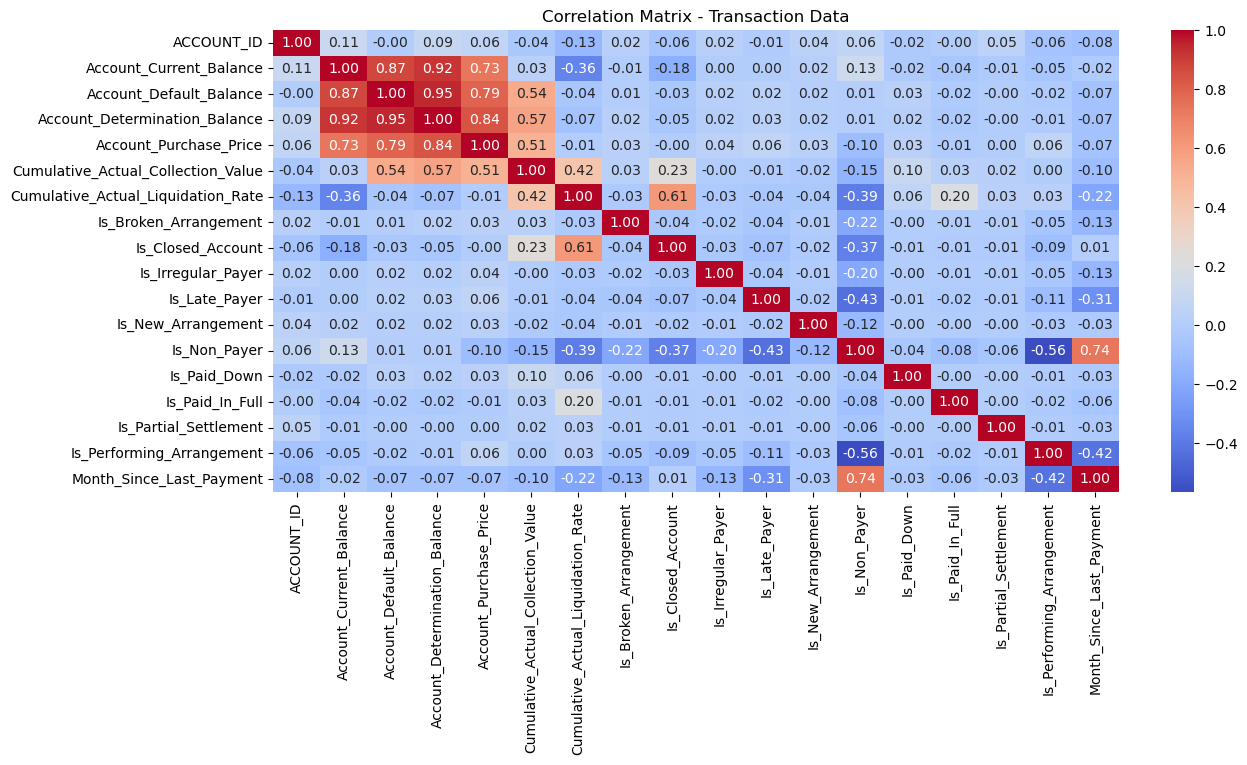

In [6]:
# Select numerical columns and create new DataFrame
transaction_data_num = transaction_data.select_dtypes(include='number')

# Correlation matrix for numerical columns
correlation_matrix_transaction = transaction_data_num.corr()

# Plot correlation matrix using heatmap
plt.figure(figsize=(30, 6))
plt.subplot(1, 2, 1)
sns.heatmap(correlation_matrix_transaction, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Correlation Matrix - Transaction Data")

plt.show()

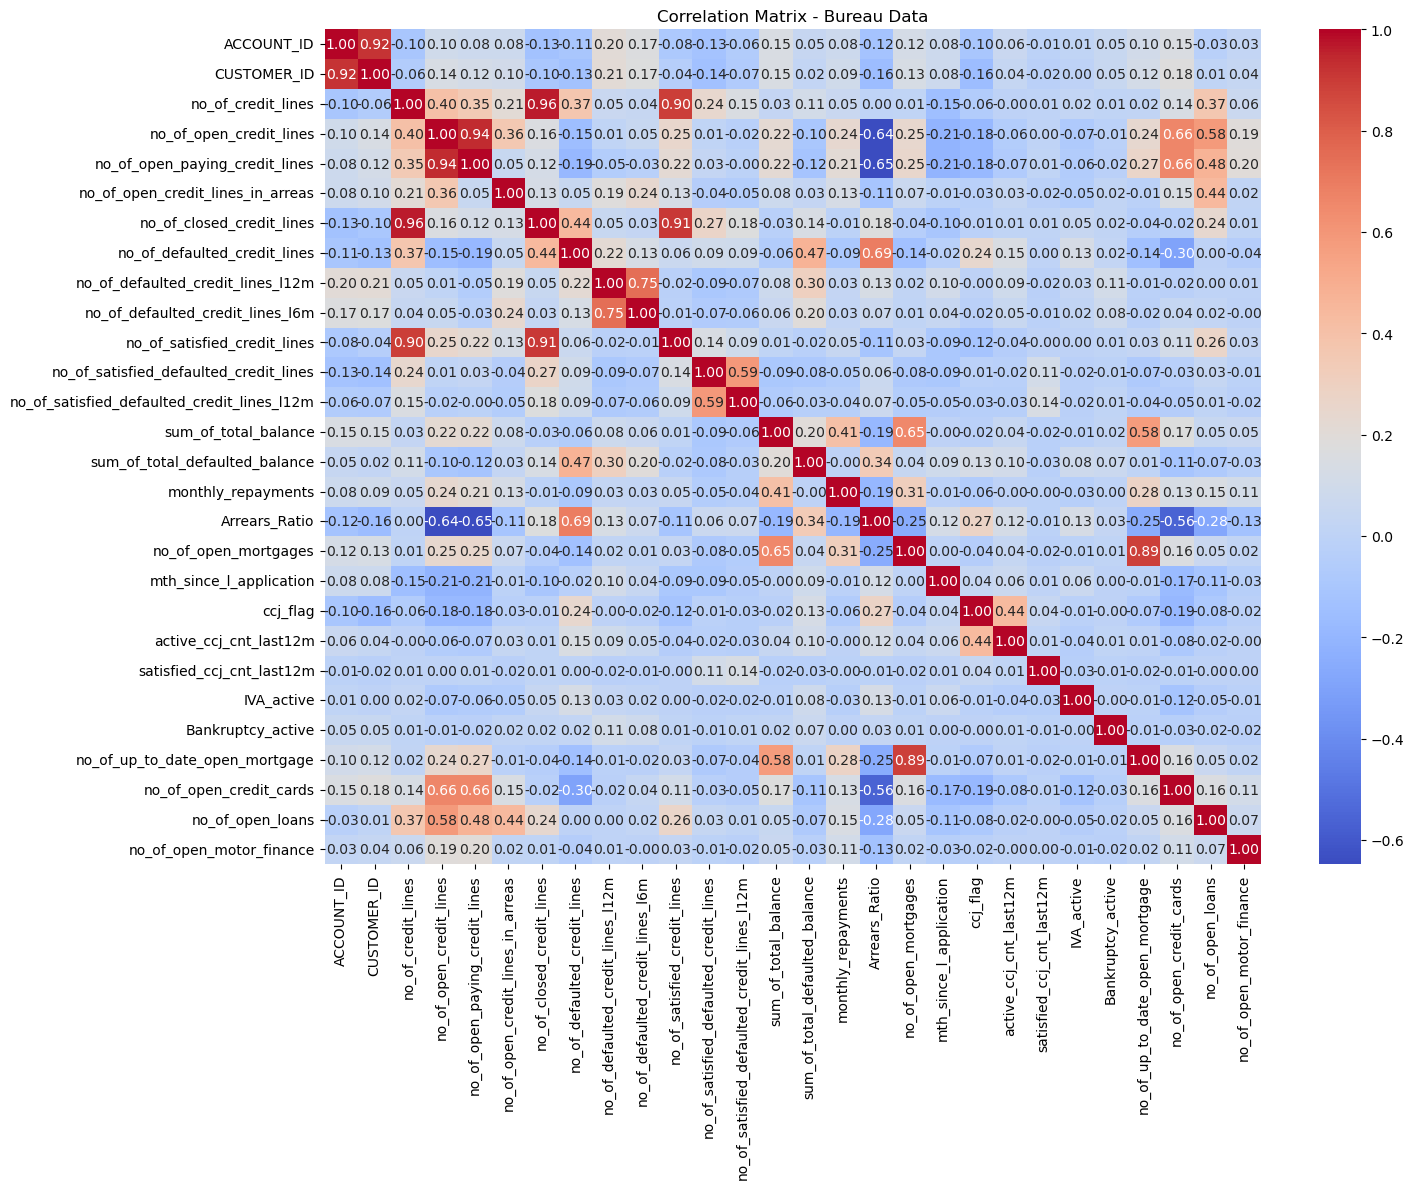

In [7]:
# Select numerical columns and create new DataFrame
bureau_data_num = bureau_data.select_dtypes(include='number')

# Correlation matrix for numerical columns
correlation_matrix_bureau = bureau_data_num.corr()

# Plot correlation matrix using heatmap
plt.figure(figsize=(27, 12))

plt.subplot(1, 2, 2)
sns.heatmap(correlation_matrix_bureau, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Correlation Matrix - Bureau Data")

plt.tight_layout()
plt.show()

****Important Feature Selection****

Important features are now going to be pulled out from each dataset that are directly relevant to the business problem. The focus is going to be on variables that are likely to differentiate the clusters in a way that aligns with the problem. Where variables are showing a similar story, one of them will be chosen rather than both/all.

In [8]:
# Select important fields from transaction_data
selected_repay_transaction_columns = ['ACCOUNT_ID', 'Account_Current_Balance', 'Account_Default_Balance',
                                 'Account_Purchase_Price', 'Cumulative_Actual_Collection_Value', 
                                 'Is_Non_Payer', 'Month_Since_Last_Payment']

transaction_repay_selected = transaction_data[selected_repay_transaction_columns]

# Select important fields from bureau_data
selected_repay_bureau_columns = ['ACCOUNT_ID', 'no_of_credit_lines', 'no_of_open_credit_lines',
                            'no_of_open_paying_credit_lines', 'no_of_closed_credit_lines', 
                            'no_of_defaulted_credit_lines', 'sum_of_total_balance', 
                            'Bankruptcy_active', 'sum_of_total_defaulted_balance', 
                                 'no_of_satisfied_credit_lines', 'Arrears_Ratio']

bureau_repay_selected = bureau_data[selected_repay_bureau_columns]

# Merge DataFrames on 'ACCOUNT_ID'
merged_data = pd.merge(transaction_repay_selected, bureau_repay_selected, on='ACCOUNT_ID', how='inner')

# Display the merged DataFrame
merged_data.head()

,ACCOUNT_ID,Account_Current_Balance,Account_Default_Balance,Account_Purchase_Price,Cumulative_Actual_Collection_Value,Is_Non_Payer,Month_Since_Last_Payment,no_of_credit_lines,no_of_open_credit_lines,no_of_open_paying_credit_lines,no_of_closed_credit_lines,no_of_defaulted_credit_lines,sum_of_total_balance,Bankruptcy_active,sum_of_total_defaulted_balance,no_of_satisfied_credit_lines,Arrears_Ratio
0,959,3105.15,NaN,841.50,NaN,1,NaN,34.0,9.0,7.0,25.0,15.0,20664.0,0.0,11335.0,9.0,5.01
1,1561,1783.80,NaN,483.41,NaN,1,NaN,19.0,1.0,1.0,18.0,14.0,12056.0,0.0,12056.0,1.0,7.47
2,3805,1151.00,NaN,79.42,NaN,1,NaN,12.0,0.0,0.0,12.0,11.0,16331.0,0.0,16331.0,0.0,8.00
3,4828,3787.20,NaN,261.32,NaN,1,NaN,25.0,5.0,2.0,20.0,10.0,6614.0,0.0,5922.0,9.0,5.36
4,6716,753.30,697.0,63.80,NaN,1,NaN,9.0,1.0,1.0,8.0,6.0,6077.0,0.0,6077.0,2.0,6.86


***Heatmap for merged data***

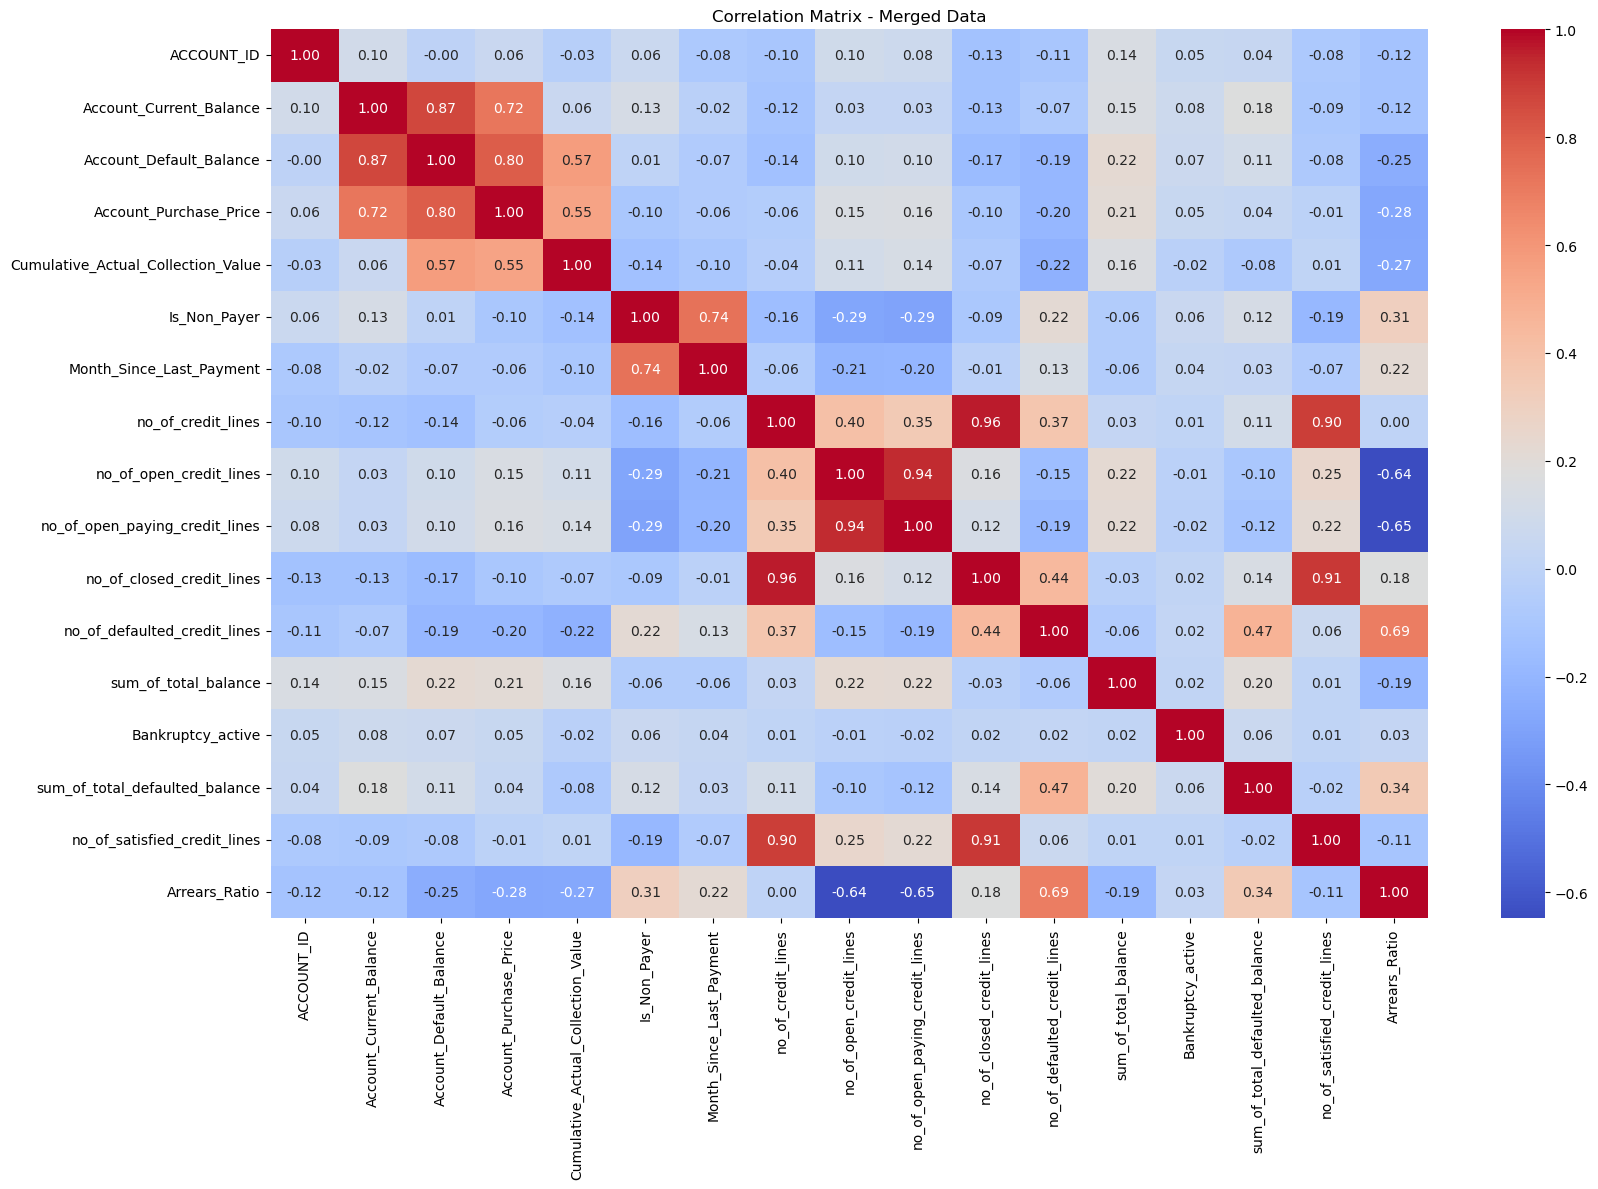

In [9]:
# Select numerical columns and create new DataFrames
merged_data_num = merged_data.select_dtypes(include='number')

# Correlation matrix for numerical columns
correlation_matrix_merged = merged_data_num.corr()

# Plot correlation matrix using heatmap
plt.figure(figsize=(32, 12))

plt.subplot(1, 2, 2)
sns.heatmap(correlation_matrix_merged, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Correlation Matrix - Merged Data")

plt.tight_layout()
plt.show()

***Data Distributions***

Next step is visual examination of the distribution characteristics of key variables using histograms and boxplots. This analysis aims to identify any signs of skewness and outliers within the dataset, providing valuable insights into the data's distributional patterns and potential influences on subsequent analyses.

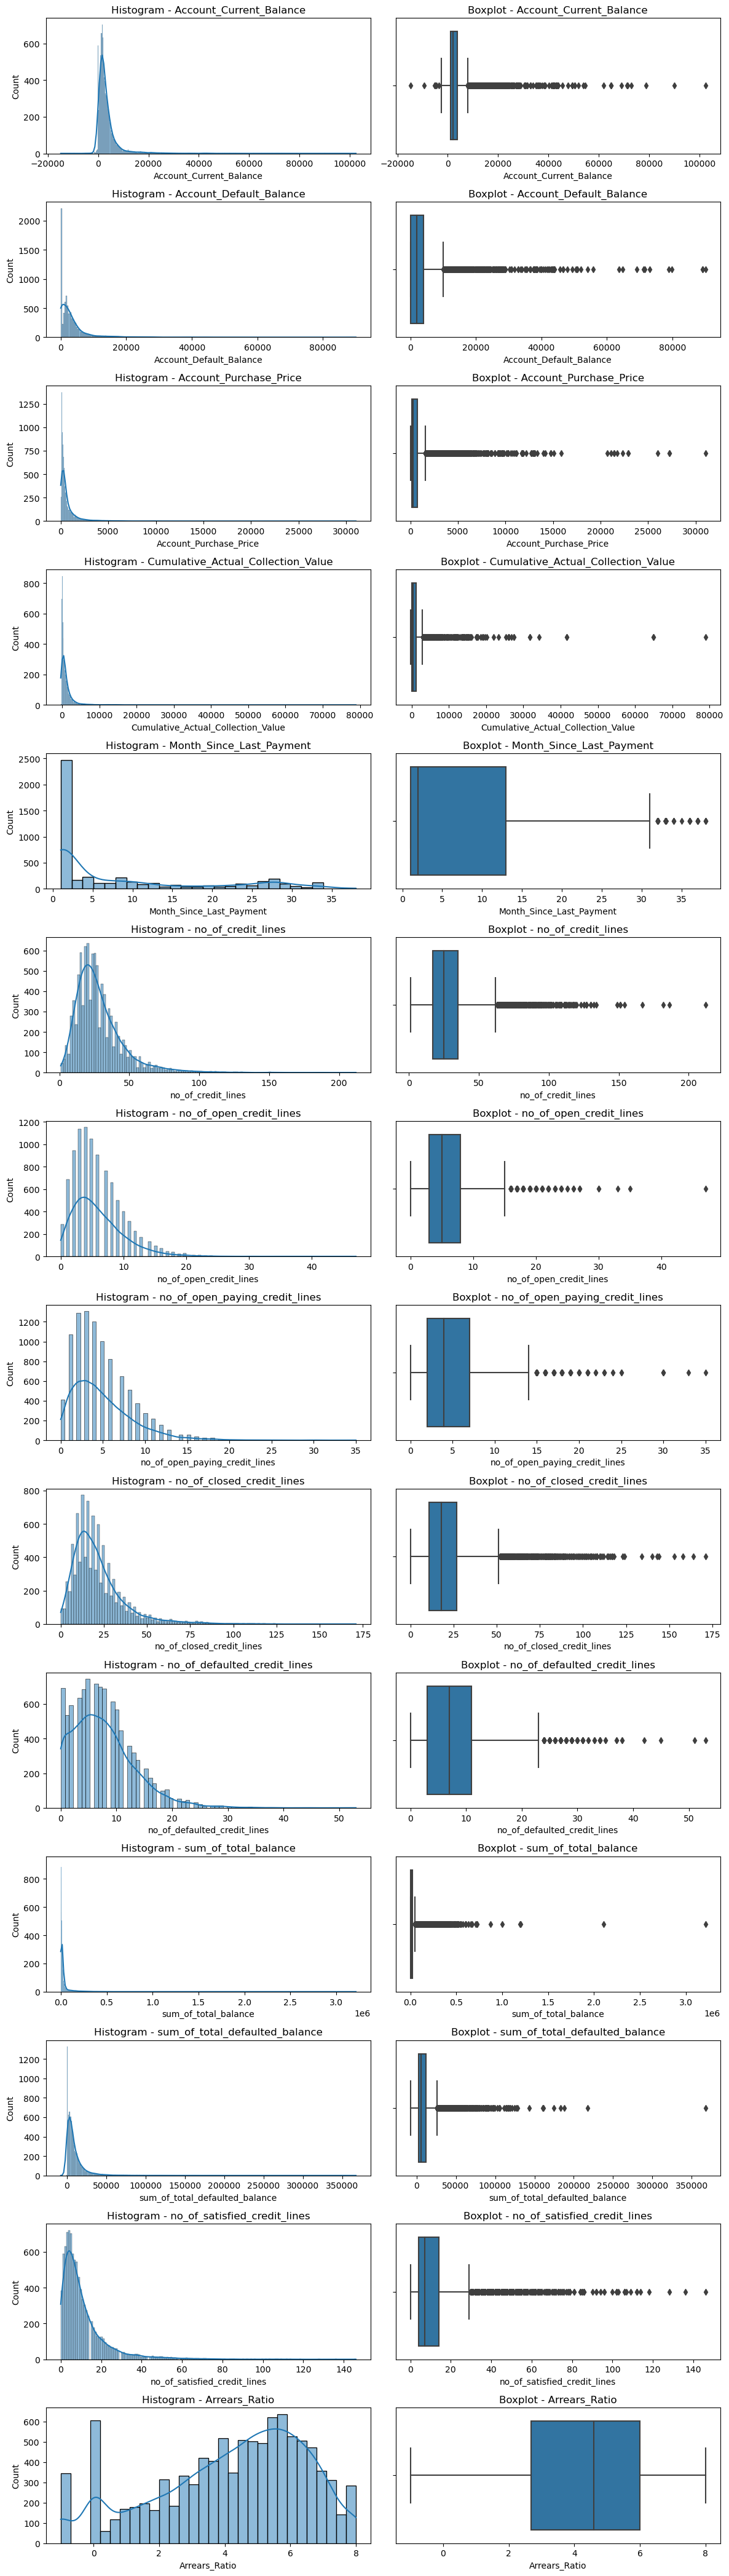

In [10]:
columns_to_visualise = [
    'Account_Current_Balance',
    'Account_Default_Balance',
    'Account_Purchase_Price',
    'Cumulative_Actual_Collection_Value',
    'Month_Since_Last_Payment',
    'no_of_credit_lines',
    'no_of_open_credit_lines',
    'no_of_open_paying_credit_lines',
    'no_of_closed_credit_lines',
    'no_of_defaulted_credit_lines',
    'sum_of_total_balance',
    'sum_of_total_defaulted_balance',
    'no_of_satisfied_credit_lines',
    'Arrears_Ratio'
]

# Set up the subplots
fig, axes = plt.subplots(nrows=len(columns_to_visualise), ncols=2, figsize=(12, 3 * len(columns_to_visualise)))

# Plot data distribution for each column
for i, column in enumerate(columns_to_visualise):
    # Histogram
    sns.histplot(merged_data[column], ax=axes[i, 0], kde=True)
    axes[i, 0].set_title(f'Histogram - {column}')
    
    # Boxplot
    sns.boxplot(x=merged_data[column], ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot - {column}')

# Adjust layout
plt.tight_layout()
plt.show()

Observing skewed distributions and extreme values in several variables, including 'Account_Current_Balance', 'Account_Default_Balance', 'Account_Purchase_Price', 'Cumulative_Actual_Collection_Value', 'sum_of_total_balance', and 'sum_of_total_defaulted_balance', it is crucial to address these outliers to prevent them from unduly influencing cluster analysis results.

To handle these outliers, z-scores are going to be utilised for outlier identification. The process involves creating two distinct datasets: one for the outliers (outlier_data) and another for the remaining data (non_outliers_data). Separate cluster analyses will then be performed on these datasets.

***Separating Outliers***

In [11]:
from scipy.stats import zscore

# List of columns to check for outliers
columns_to_check = [
    'Account_Current_Balance',
    'Account_Default_Balance',
    'Account_Purchase_Price',
    'Cumulative_Actual_Collection_Value',
    'sum_of_total_balance',
    'sum_of_total_defaulted_balance'
]

# Calculate z-scores for selected columns
z_scores = zscore(merged_data[columns_to_check])

# Set a threshold for considering values as outliers (e.g., 3 standard deviations)
outlier_threshold = 3

# Identify rows with outliers
outliers = (z_scores > outlier_threshold).any(axis=1)

# Create separate datasets for outliers and non-outliers
outlier_data = merged_data[outliers]
non_outlier_data = merged_data[~outliers]

# Count of observations in outlier_data and non_outlier_data
outlier_count = outlier_data.shape[0]
non_outlier_count = non_outlier_data.shape[0]

# Display the counts
print("Number of observations in outlier_data:", outlier_count)
print("Number of observations in non_outlier_data:", non_outlier_count)

Number of observations in outlier_data: 260
Number of observations in non_outlier_data: 9732


Checking the non_outlier_data distributions now - to ensure we have fewer outliers and less skew.

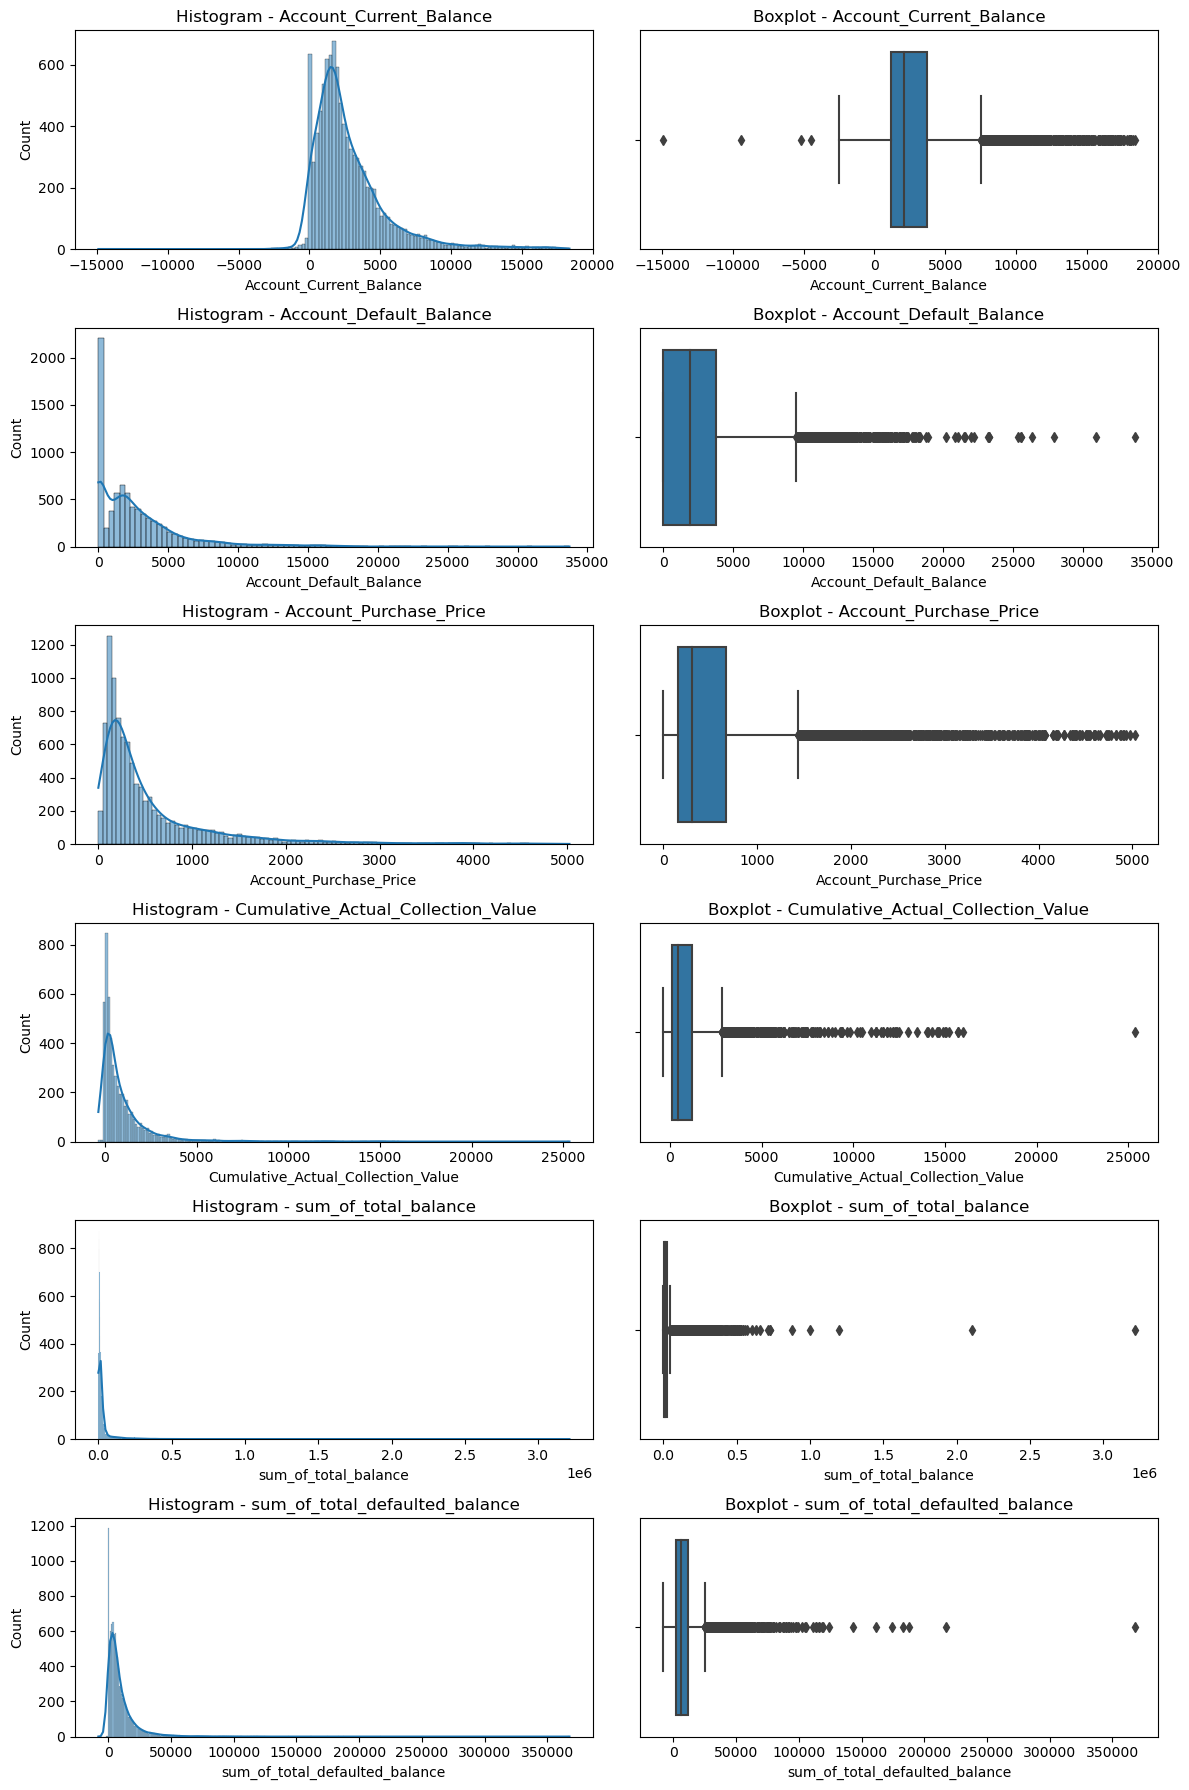

In [12]:
# Set up the subplots
fig, axes = plt.subplots(nrows=len(columns_to_check), ncols=2, figsize=(12, 3 * len(columns_to_check)))

# Plot data distribution for each column
for i, column in enumerate(columns_to_check):
    # Histogram
    sns.histplot(non_outlier_data[column], ax=axes[i, 0], kde=True)
    axes[i, 0].set_title(f'Histogram - {column}')
    
    # Boxplot
    sns.boxplot(x=non_outlier_data[column], ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot - {column}')

# Adjust layout
plt.tight_layout()
plt.show()

I can see that the skewness of the charts looks much better now that outliers have been removed. For the rest of this analysis I will be focusing on the non_outlier_data.

***Missing Values***

KMeans clustering technique cannot deal with missing values. Taking a look at each field in turn to determine the percentage of nulls in each field.

In [13]:
# Calculate percentage of null values for each field
null_percentage = (non_outlier_data.isnull().mean() * 100).round(2)

# Display the result
print(null_percentage)

ACCOUNT_ID                             0.00
Account_Current_Balance                0.00
Account_Default_Balance               17.23
Account_Purchase_Price                 0.00
Cumulative_Actual_Collection_Value    47.30
Is_Non_Payer                           0.00
Month_Since_Last_Payment              51.97
no_of_credit_lines                     3.16
no_of_open_credit_lines                3.16
no_of_open_paying_credit_lines         3.16
no_of_closed_credit_lines              3.16
no_of_defaulted_credit_lines           3.16
sum_of_total_balance                   3.16
Bankruptcy_active                      3.08
sum_of_total_defaulted_balance         3.36
no_of_satisfied_credit_lines           3.16
Arrears_Ratio                          0.00
dtype: float64


Months since last payment has a high percentage of nulls - as these are representative of no credit application in 24 months therefore I will replace values with 0.

Cumulative_Actual_Collection_Value also has a high percentage of nulls - an assumption here is also going to be made that this means that the account has not made a payment, therefore replace with 0.

The same assumption will be made for Account Default Balance and the values will be replaced by 0.

For the credit lines data, nulls here represent the absence of any credit lines for the individual therefore I will replace these values with.

For all of the above assumptions it would be recommended to have a thorough look at each field with an expert before making a decision on how to deal with the null values.

The nulls will be replaced just before the cluster algorithm is run.

**Should the data be scaled?**

In [14]:
non_outlier_data.describe()

,ACCOUNT_ID,Account_Current_Balance,Account_Default_Balance,Account_Purchase_Price,Cumulative_Actual_Collection_Value,Is_Non_Payer,Month_Since_Last_Payment,no_of_credit_lines,no_of_open_credit_lines,no_of_open_paying_credit_lines,no_of_closed_credit_lines,no_of_defaulted_credit_lines,sum_of_total_balance,Bankruptcy_active,sum_of_total_defaulted_balance,no_of_satisfied_credit_lines,Arrears_Ratio
count,9732.000000,9732.000000,8055.000000,9732.000000,5129.000000,9732.000000,4674.000000,9424.000000,9424.000000,9424.000000,9424.000000,9424.000000,9.424000e+03,9432.000000,9405.000000,9424.000000,9732.000000
mean,4943.180847,2826.126661,2749.374217,565.356428,980.912751,0.696157,8.531665,28.478247,5.832874,4.829902,21.583510,7.736205,2.895770e+04,0.008270,9286.210952,11.046053,4.247016
std,2828.774280,2708.898203,3258.524853,691.668569,1628.644205,0.459939,10.359407,17.380912,4.000183,3.572988,15.497592,5.641057,7.222998e+04,0.090566,12698.976655,12.278888,2.258015
min,1.000000,-14902.310000,0.000000,0.000000,-357.860000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-1.830000e+02,0.000000,-7936.000000,0.000000,-1.000000
25%,2499.750000,1154.752500,0.000000,153.947500,116.750000,0.000000,1.000000,17.000000,3.000000,2.000000,12.000000,4.000000,5.537750e+03,0.000000,2503.000000,4.000000,2.820000
50%,4932.500000,2066.400000,1901.250000,308.130000,447.460000,1.000000,2.000000,25.000000,5.000000,4.000000,18.000000,7.000000,1.080750e+04,0.000000,5795.000000,7.000000,4.660000
75%,7373.250000,3712.925000,3797.220000,667.992500,1200.000000,1.000000,13.000000,35.000000,8.000000,7.000000,27.000000,11.000000,2.224050e+04,0.000000,11660.000000,14.000000,6.000000
max,9921.000000,18359.110000,33713.980000,5023.830000,25343.040000,1.000000,38.000000,212.000000,47.000000,35.000000,171.000000,53.000000,3.213231e+06,1.000000,367556.000000,146.000000,8.000000


Scaling the data is important in this case due to the varying scales and magnitudes of the variables.

The above variables have different ranges and magnitudes. Variables with larger scales and magnitudes may have a greater influence on the overall clustering results.

Scaling the data helps to bring all the variables to a similar scale, making them comparable and ensuring that no variable dominates the clustering process solely based on its larger scale. It helps in removing the bias introduced by variables with larger magnitudes, allowing all variables to contribute equally to the clustering algorithm.

Therefore, scaling the data in this case would be beneficial to ensure fair and accurate clustering results.

In [15]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Select numerical columns in merged_data
numerical_columns = non_outlier_data.select_dtypes(include=np.number).columns
exclude_columns = ['ACCOUNT_ID']
numerical_columns = [col for col in numerical_columns if col not in exclude_columns]

# Scale the numerical columns using Min-Max Scaling
scaler = MinMaxScaler()
non_outlier_data_scaled = pd.DataFrame(scaler.fit_transform(non_outlier_data[numerical_columns]), columns=numerical_columns)

Box plots can now be created with this scaled data to visualise the outliers in one chart.

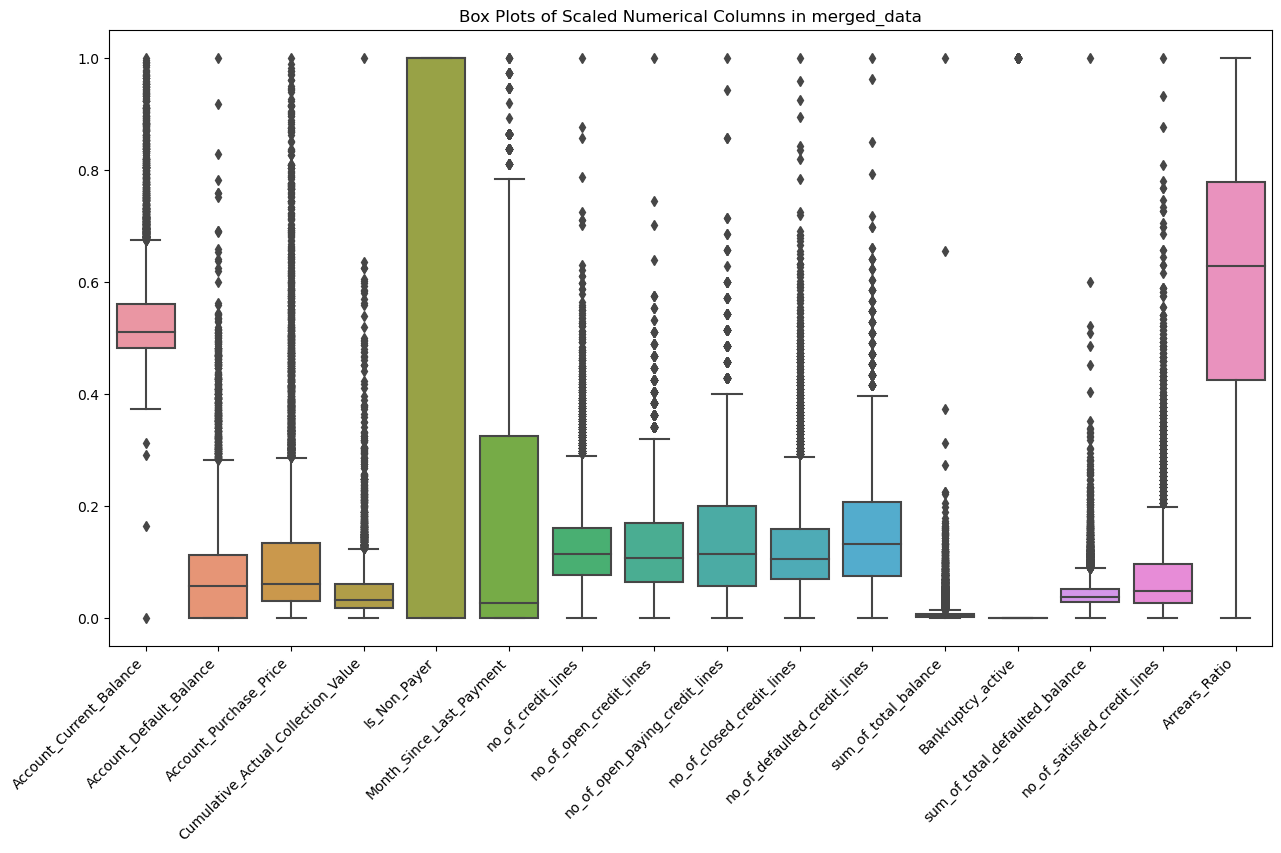

In [16]:
# Create box plots for scaled numerical columns
plt.figure(figsize=(15, 8))
sns.boxplot(data=non_outlier_data_scaled)
plt.title("Box Plots of Scaled Numerical Columns in merged_data")
plt.xticks(rotation=45, ha="right")
plt.show()

There are many outliers in this data. Many of these outliers are indicative of commercial customers who owe money, therefore removing them might lead to an incomplete or distorted understanding of the data. Insight can be gained by delving deeper into these outliers to understand the specific characteristics of these commercial accounts, analyse their behavior, and formulate a targeted plan for managing them.

**Section 2: KMeans Clustering**

The KMeans cluster algorithm is used here is used to group accounts into clusters based upon features.

The KMeans algorithm underwent multiple test runs with varied seeds to generate segments. Through visual examination of the resulting box plots, key features were identified for establishing upper and lower bounds. These features strongly reflect the targeted behaviour, exhibit significant variability across clusters, and distinctly delineate individual clusters. Imposing bounds on these crucial features communicates their significance to the model, emphasising their role in determining the clusters.

Explanation of the masks: 
These masks are boolean conditions that evaluate to True or False for each row in the 'non_outlier_data_scaled' DataFrame.
Each condition in the masks checks whether the corresponding column values satisfy the specified upper or lower bounds.

mask_positive_cluster is True for rows where all of the following conditions are satisfied:
- Arrears_Ratio is less than or equal to the upper_bound_arrears_ratio 
- total_open_credit_lines is less than or equal to the upper_bound_total_open_credit_lines 
- account_current_balance is less than or equal to the upper_bound_account_current_balance 
- months_since_last_payment is less than or equal to the upper_bound_months_since_last_payment 
- no_of_defaulted_credit_lines is less than or equal to the upper_bound_no_of_defaulted_credit_lines 
- no_of_satisfied_credit_lines is more than or equal to the upper_bound_no_of_satisfied_credit_lines

Similarly, mask_negative_cluster is True for rows where all of the following conditions are satisfied: 
- Arrears_Ratio is greater than or equal to the lower_bound_arrears_ratio 
- total_open_credit_lines is greater than or equal to the lower_bound_total_open_credit_lines 
- account_current_balance is greater than or equal to the lower_bound_account_current_balance 
- months_since_last_payment is greater than or equal to the lower_bound_months_since_last_payment 
- no_of_defaulted_credit_lines is greater than or equal to the lower_bound_no_of_defaulted_credit_lines 
- no_of_satisfied_credit_lines is less than or equal to the lower_bound_no_of_satisfied_credit_lines 

In [21]:
import random
import os
from sklearn.cluster import KMeans
from scipy.cluster.vq import kmeans, vq

# Choose the number of clusters (you can experiment with different values)
num_clusters = 6 

# Set the random seed value
seed_val = 10

# Set the number of initialisation attempts
n_init = 10

# Set the environment variable to address the memory leak issue
os.environ['OMP_NUM_THREADS'] = '5'

# Fill missing values in numerical data with 0 (as discussed above)
non_outlier_data_scaled.fillna(0, inplace=True)

# Set custom constraints
upper_bound_arrears_ratio = 0.5
upper_bound_account_current_balance = 0.5
upper_bound_months_since_last_payment = 0.2
upper_bound_no_of_defaulted_credit_lines = 0.1
upper_bound_no_of_satisfied_credit_lines = 0.05

lower_bound_arrears_ratio = 0.7
lower_bound_account_current_balance = 0.6
lower_bound_months_since_last_payment = 0.3
lower_bound_no_of_defaulted_credit_lines = 0.2
lower_bound_no_of_satisfied_credit_lines = 0.1

# Create masks for constraints
mask_positive_cluster = (
    (non_outlier_data_scaled['Arrears_Ratio'] <= upper_bound_arrears_ratio) &
    (non_outlier_data_scaled['Account_Current_Balance'] <= upper_bound_account_current_balance) &
    (non_outlier_data_scaled['Month_Since_Last_Payment'] <= upper_bound_months_since_last_payment) &
    (non_outlier_data_scaled['no_of_defaulted_credit_lines'] <= upper_bound_no_of_defaulted_credit_lines) &
    (non_outlier_data_scaled['no_of_satisfied_credit_lines'] >= lower_bound_no_of_satisfied_credit_lines) 
)

mask_negative_cluster = (
    (non_outlier_data_scaled['Arrears_Ratio'] >= lower_bound_arrears_ratio) &
    (non_outlier_data_scaled['Account_Current_Balance'] >= lower_bound_account_current_balance) &
    (non_outlier_data_scaled['Month_Since_Last_Payment'] >= lower_bound_months_since_last_payment) &
    (non_outlier_data_scaled['no_of_defaulted_credit_lines'] >= lower_bound_no_of_defaulted_credit_lines) &
    (non_outlier_data_scaled['no_of_satisfied_credit_lines'] <= upper_bound_no_of_satisfied_credit_lines)
)

# Assign labels based on the masks
custom_labels = np.zeros(len(non_outlier_data_scaled))
custom_labels[mask_positive_cluster] = 1
custom_labels[mask_negative_cluster] = 2

# Perform k-means with custom labels
kmeans_custom = KMeans(n_clusters=num_clusters, random_state=seed_val, n_init=n_init)
kmeans_custom.fit(non_outlier_data_scaled, sample_weight=(custom_labels != 0))
labels_custom = kmeans_custom.labels_

# Assign cluster labels to the dataset
non_outlier_data.loc[:, 'Cluster_Label'] = labels_custom

# Calculate cluster sizes
cluster_sizes_custom = np.bincount(labels_custom)

# Print the cluster labels and sizes
for label, size in enumerate(cluster_sizes_custom):
    print(f"Cluster Label (Custom): {label}, Size: {size}")


Cluster Label (Custom): 0, Size: 4763
Cluster Label (Custom): 1, Size: 266
Cluster Label (Custom): 2, Size: 54
Cluster Label (Custom): 3, Size: 2012
Cluster Label (Custom): 4, Size: 2133
Cluster Label (Custom): 5, Size: 504


1. Analyse Cluster Characteristics:

Examine the descriptive statistics of each cluster. This can provide insights into the average values of different features within each cluster.

***Average values* for each Cluster***

In [18]:
cluster_summary = non_outlier_data.groupby('Cluster_Label').mean()
cluster_summary.head(6)

,ACCOUNT_ID,Account_Current_Balance,Account_Default_Balance,Account_Purchase_Price,Cumulative_Actual_Collection_Value,Is_Non_Payer,Month_Since_Last_Payment,no_of_credit_lines,no_of_open_credit_lines,no_of_open_paying_credit_lines,no_of_closed_credit_lines,no_of_defaulted_credit_lines,sum_of_total_balance,Bankruptcy_active,sum_of_total_defaulted_balance,no_of_satisfied_credit_lines,Arrears_Ratio
Cluster_Label,,,,,,,,,,,,,,,,,
0,5203.576107,2969.946521,2547.179894,401.982450,661.114962,1.0,10.437768,26.820405,5.803878,4.751653,20.101146,7.486117,26668.101587,0.010346,8331.367049,9.961877,4.142647
1,5963.530075,2684.987932,3946.565574,1025.538872,1401.565623,0.0,1.881679,39.285714,15.387218,13.913534,22.375940,3.030075,90579.266917,0.000000,3926.522556,16.537594,1.132857
2,4342.277778,1040.337222,1664.755000,816.421481,1822.741852,0.0,3.370370,111.870370,9.648148,7.962963,98.851852,5.000000,16324.462963,0.000000,4547.574074,82.370370,2.673148
3,4744.665507,3700.228236,3114.035032,638.516123,326.270891,1.0,23.553672,26.179104,3.432836,2.747264,21.803980,10.979104,25426.017910,0.013930,14803.138377,8.373134,6.068792
4,4709.187998,2019.618228,2911.637121,763.959761,1371.591556,0.0,2.735336,24.299220,6.616472,5.581384,16.620370,5.239766,30212.818713,0.001460,6540.832681,8.792885,3.133390
5,3790.984127,1656.586290,1997.746343,706.955635,1176.657340,0.0,2.312000,54.950397,7.023810,5.650794,45.561508,9.996032,27378.875000,0.000000,10344.033730,30.101190,4.485933


***Max values* for each Cluster***

In [19]:
cluster_summary_max = non_outlier_data.groupby('Cluster_Label').max()
cluster_summary_max.head(6)

,ACCOUNT_ID,Account_Current_Balance,Account_Default_Balance,Account_Purchase_Price,Cumulative_Actual_Collection_Value,Is_Non_Payer,Month_Since_Last_Payment,no_of_credit_lines,no_of_open_credit_lines,no_of_open_paying_credit_lines,no_of_closed_credit_lines,no_of_defaulted_credit_lines,sum_of_total_balance,Bankruptcy_active,sum_of_total_defaulted_balance,no_of_satisfied_credit_lines,Arrears_Ratio
Cluster_Label,,,,,,,,,,,,,,,,,
0,9919,18359.11,23265.00,4909.31,13500.00,1,36.0,130.0,35.0,30.0,116.0,42.0,3213231.0,1.0,143406.0,102.0,8.00
1,9904,16297.34,23290.18,4733.84,9250.00,0,33.0,109.0,33.0,33.0,80.0,22.0,723888.0,0.0,47464.0,58.0,4.76
2,8291,6659.32,7264.32,2448.88,6726.19,0,33.0,212.0,47.0,35.0,171.0,21.0,96498.0,0.0,65100.0,146.0,6.73
3,9921,18026.09,33713.98,5023.83,15982.68,1,38.0,134.0,18.0,18.0,124.0,53.0,1000918.0,1.0,367556.0,106.0,8.00
4,9920,18116.31,30937.46,4904.41,15706.13,0,38.0,57.0,16.0,13.0,42.0,23.0,1197697.0,1.0,93902.0,34.0,8.00
5,9467,13074.87,15790.87,4822.53,25343.04,0,33.0,101.0,17.0,13.0,93.0,45.0,438765.0,0.0,174561.0,74.0,8.00


2. Visualise Clusters

Visualising the cluster distribution through box plots provides valuable insights into the characteristics of each cluster, aiding in the formulation of targeted strategies for different account groups. This approach allows for a comprehensive understanding of how variables vary across clusters, guiding strategic decisions tailored to each group. 

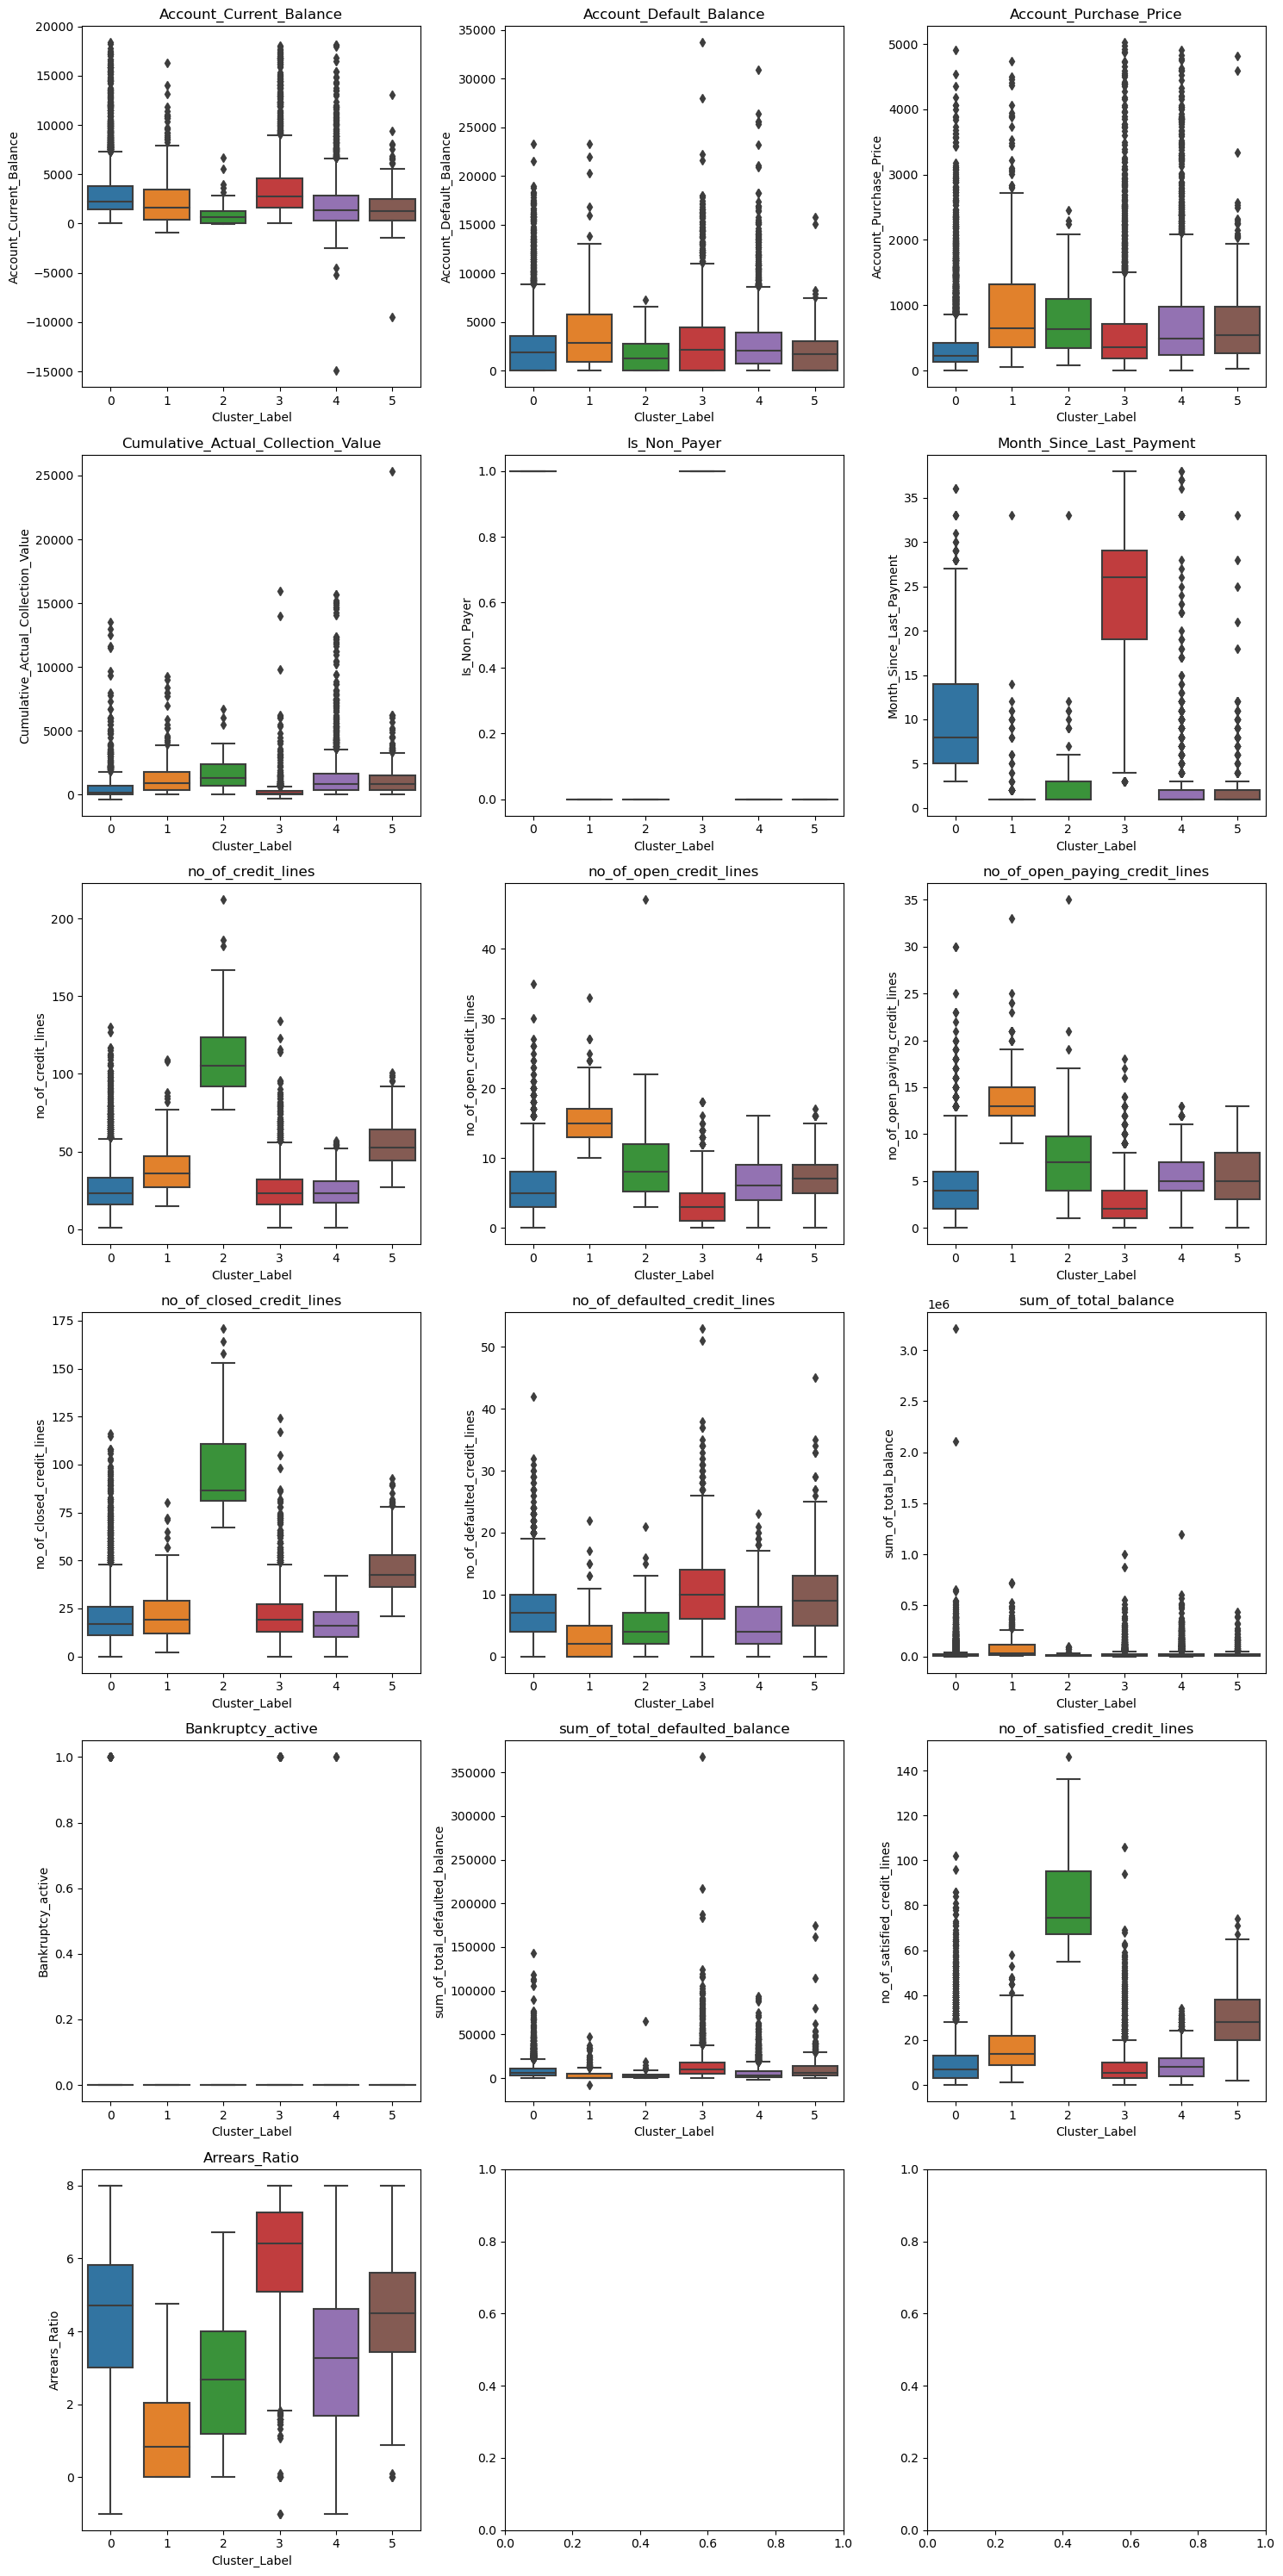

In [20]:
# Set up a grid for subplots
num_plots = len(non_outlier_data.columns) - 2
num_cols = 3 
num_rows = (num_plots - 1) // num_cols + 1

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Counter for the actual plots (excluding 'ACCOUNT_ID' and 'Cluster_Label')
plot_counter = 0

for i, feature in enumerate(non_outlier_data.columns):
    if feature not in ['ACCOUNT_ID', 'Cluster_Label']:
        sns.boxplot(x='Cluster_Label', y=feature, data=non_outlier_data, ax=axes[plot_counter])
        axes[plot_counter].set_title(feature)
        plot_counter += 1

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


3. Analyse Clusters

****Cluster 0****

Description:
Satisfied credit lines: Average of 9.96, on the lower end
Arrears Ratio: Average of 4.14, second highest average
Is non-payer: Yes for all accounts
Bankruptcy active: Yes for some accounts
Account Current Balance: Average of £2,970, maximum account balance of £18,359
Cumulative Actual Collection Value: Average of £402, on the lower end
Months since last payment: average of 10.4, second highest of all clusters

Cluster 0 appears to be a fairly high-risk segment with a lower number of satisfied credit lines and an average arrears ratio on the higher end. All of the customers in this cluster are classified as non-payers and some have active bankruptcies. The average account current balance is £2,970, which is relatively low, and the cumulative actual collection value is in the lower range.

Recommendation:
More analysis is needed within this cluster to segment further to create different strategies for different customers e.g. different strategies for accounts that are bankruptcy active vs not. 
Identify any outliers that may warrant a different approach - focusing into the variance in months since last payment and number of satisfied credit lines.
Continuously evaluate and refine collection strategies for this cluster based on performance metrics and feedback.

****Cluster 1****

Description:
No of Satisfied Credit Lines: Average of 16.54, average within clusters
Arrears Ratio: Average of 1.13, lowest of all clusters
Is non-payer: No accounts
Bankruptcy active: No accounts
Account Current Balance: Average of £2,685, maximum account balance of £16,297
Cumulative Actual Collection Value: Average of £1,026
No of Defaulted Credit Lines: Average of 3, lowest of all clusters

Cluster 1 represents a segment with a high average number of satisfied credit lines and a low arrears ratio. Customers in this cluster are not classified as non-payers or have active bankruptcies. 

Recommendation:
Considering the low-risk profile, higher account balances, and a substantial number of satisfied credit lines, it may be beneficial to explore settlement options with customers in Cluster 1.


****Cluster 2****

Description:
No of Satisfied Credit Lines: Average of 82, highest average by quite a bit compared to other clusters
Arrears Ratio: Average of 2.7, second lowest
Is non-payer: No accounts
Bankruptcy active: No accounts
Account Current Balance: Average of £1040, maximum account balance of £6,659
Cumulative Actual Collection Value: Average of £816
No of Defaulted Credit Lines: Average of 5.00

Cluster 2 exhibits characteristics of a segment with a moderate number of satisfied credit lines and a relatively low arrears ratio. None of the customers in this cluster are classified as non-payers or have active bankruptcies. 

Recommendation:
Considering the moderate-risk profile and lower account balances, offering settlements may be a suitable strategy for customers in Cluster 2.

****Cluster 3****

Description:
No of Satisfied Credit Lines: Average of 8.4, on the lower end
Arrears Ratio: Average of 6.07, highest of all clusters
Is non-payer: Yes for all accounts
Bankruptcy active: Yes for some accounts
Account Current Balance: Average of £3700.23, maximum account balance of £18,026
Cumulative Actual Collection Value: Average of £639
No of Defaulted Credit Lines: Average of 11.0, highest of all clusters
Months since last payment: average of 23.5, highest of all clusters

Cluster 3 appears to be a fairly high-risk segment with a relatively lower average number of satisfied credit lines, the highest arrears ratio among all clusters and the highest average number of months since last payment. All customers in this cluster are classified as non-payers, and some have active bankruptcies.

Recommendation:
Considering the high-risk profile of Cluster 3 with a high arrears ratio, non-payer status, high account balances, and highest number of months since last payment it may be advisable to initiate litigation for some accounts in this cluster. Litigation could help in securing a legal resolution and potentially recovering higher amounts owed.

However, it's crucial to carefully assess each account individually and consider offering settlement options before proceeding with litigation, particularly for accounts with extreme balances. Some accounts in this group have active bankruptcy therefore special care needs to be taken with these.


****Cluster 4****

Description:
No of Satisfied Credit Lines: Average of 8.8, on the lower end
Arrears Ratio: Average of 3.13, mid-range
Is non-payer: No
Bankruptcy active: Yes for some customers
Account Current Balance: Average of £2,020, maximum account balance of £18,116
Cumulative Actual Collection Value: Average of £764
No of Defaulted Credit Lines: Average of 5.24, average

Cluster 4 indicates a segment with a moderate number of satisfied credit lines and a relatively low arrears ratio. While none of the customers in this cluster are classified as non-payers, some have active bankruptcies.

Recommendation:
Considering the moderate-risk profile and lower account balances, a combination of settlement negotiations and legal actions may be appropriate for customers in Cluster 4.


****Cluster 5****

Description:
No of Satisfied Credit Lines: Average of 30, on the higher end
Arrears Ratio: Average of 4.5, mid-high
Is non-payer: No accounts
Bankruptcy active: No accounts
Account Current Balance: Average of £1,657, maximum account balance of £13,074
Cumulative Actual Collection Value: Average of £707
No of Defaulted Credit Lines: Average of 10, on the higher end

Recommendation:
Given the moderate-risk profile and lower account balances, offering settlements may be a suitable strategy for customers in Cluster 5, especially those with a lower arrears ratio.

***Considerations / Recommendations***

****Outlier Analysis****
I would have liked to spend more time assessing the impact of outliers on the clusters. To gain a deeper understanding of the nature of outliers and their effect on the cluster boundaries.

****Variable Weighting****
Future iterations could include weighting of the variables based on their importance so that more important variables have a greater impact on the cluster formation. Seek advice from domain specialists who can provide valuable insights into the significance of each variable.

****Handling Null Values****
More time spent deciding the best way to treat nulls for each variable, with specialist advice.

****Collaboration with Specialists****
Engage with domain specialists or subject matter experts during the analysis process. Obtain feedback on variable selection, weighting.

***Future Steps***

1. Cluster analysis into outliers_data
This analysis focused on the main body of data, however the outliers data (260 accounts) will need to also go through cluster analysis to define segments and inform strategies.

2. Further Analysis into clusters
Some of the clusters within the analysis were highlighted as having a particular need for further analysis.This could be done by:
- Further cluster analysis
- Interactive Tableau dashboard to enable dynamic exploration and visualisation of the data within each cluster

3. Collaborative Workshops
Involve key stakeholders to brainstorm and analyse cluster specific challenges and opportunities.

4. Feedback Loops and Iterative Analysis
Would be beneficial to establish feedback loops where insights gained from the extended cluster analysis and interactive dashboards inform the refinement of existing strategies.